**Jake Bobowski**  
PHYS 304  
September 25, 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Create a function that generates the stationary states of an infinite square well of width $a$:  

$\psi_n(x) = \sqrt{\dfrac{2}{a}} \sin\left(k_n x\right)$,

where $k_n = n\pi/a$.

In [2]:
def psi_n(k_n, a, x):
    return np.sqrt( 2 / a ) * np.sin( k_n * x) 

Create a function that returns Gaussian-distributed weights centred on some $\overline{n}$ with width $\sigma$.

$P_\mathrm{G}(k) = \dfrac{1}{\sqrt{2\pi}\sigma_k} \exp\left[-\dfrac{1}{2}\left(\dfrac{k_n-\overline{k}}{\sigma_k}\right)^2\right]$

In [3]:
def Gaussian(k_bar, sigma_k, k_n):
    return 1/(np.sqrt( 2 * np.pi ) * sigma_k ) * np.exp(-1 / 2 * ( ( k_n - k_bar ) / sigma_k )**2 )   

Create a function that generates $c_k$ coefficients.  The $\sin(k_n a/2)$ factor is used to centre the pulse that we're going to contruct in the centre of the well ($x = a/2$).  Also note that the $c_n$ coefficients have **not** been normalized.  That is $\sum\limits_k |c_n|^2 \ne 1$.

In [4]:
def c_n(k_bar, sigma_k, k_n):
    return Gaussian(k_bar, sigma_k, k_n) * np.sin(k_n * a / 2 )

The function below contructs the normalized wavefunction $\Psi(x)$ from a superposition of stationary states $\psi_k(x)$ with the Gaussian-distributed $c_k$ coefficients:

$\Psi(x)=\sum\limits_k c_n(k)\psi_n(x)$

We sum states for the following range of $k$:

$\overline{k} - 5\sigma_k < k < \overline{k} + 5\sigma_k$

In [5]:
def Psi(k_bar, sigma_k, a, x):
    Psi = np.zeros(len(x))
    k_min = k_bar - 5 * sigma_k
    k_max = k_bar + 5 * sigma_k
    n_min = int(a * k_min / np.pi)
    n_max = int(a * k_max / np.pi)
    # Ensure that we don't include negative n's or n = 0
    if n_min < 1:
        n_min = 1
    k_list = [] 
    cn_list = []
    for n in range(n_min, n_max + 1):
        k = n * np.pi / a
        k_list += [k]
        cn = c_n(k_bar, sigma_k, k)
        cn_list += [cn]
        Psi += cn * psi_n(k, a, x)
    # Normalize before returning the value
    A = sum(np.abs(Psi)**2 * ( x[1] - x[0] ) )
    Psi = Psi/np.sqrt(A)
    # Normalize the c_k's
    A = sum(np.abs(cn_list)**2 * ( k_list[1] - k_list[0] ) )
    cn_list = np.array(cn_list)/np.sqrt(A)
    return Psi, k_list, cn_list

The width of the infinite square well is $a$.  We will plot the wavefunction and it's absolute square from $x=0$ to $x=a$.

Feel free to play with these parameters.  $a = 1$ is a reasonable starting point.

In [6]:
a = 1
N = int(1e5)
x = np.linspace(0, a, N) 

Here, we:

- define that average value of $n$ which sets the average value of the wavevector $k$
- the width/spread of $k$-values is set by a constant $\sigma_k$
- plot $\Psi(x)$, $\vert\Psi(x)\vert^2$, and $|c_n|^2$

Feel free to play with these parameters.  A reasonable starting point is $\overline{n} = 20$ and $\sigma_k = \overline{k}/10$ (```sigma_factor = 10```).  Try decreasing $\overline{n}$ to increase $\lambda = 2\pi/\overline{k}$ so that it approaches the well width $a$.

We then plot:

- $\Psi(x)$
- $|\Psi(x)|^2$
- $|c_n(k)|^2$

The $c_n(k)$ coefficients are the Fourier coefficients of the $\Psi(x)$ expansion in terms of the $\psi_n(x)$ stationary states. $c_n(k)$ tells us how ``aligned'' $\Psi(x)$ with is basis state $\psi_n(x)$.  As $a$ is increased, the spacing between $k$-states decreases ($k_n = n\pi/a$, $\Delta k = \pi/a$) and more and more stationary states are included in the construction of $\Psi(x)$.  

In the limit that $a\to\infty$, $k_n \to k$ and $c_n\to c(k)$ become continuous.  In that case, $c(k)$ represents the $k$-space wavefunction while $\Psi(x)$ is the realspace wavefunction.  

Put another way, $c(k)$ is the Fourier transform of $\Psi(x)$ and $\Psi(x)$ is the inverse Fourier transform of $c(k)$.

You can also try tuning $\sigma_k$ via the ```sigma_factor``` parameter.  As you broaded(narrow) $\sigma_k$, which represents the spread of momentum, you should see a corresponding narrowing(broadening) of the realspace wavefunction $\Psi(x)$.

lambda / a =  0.1


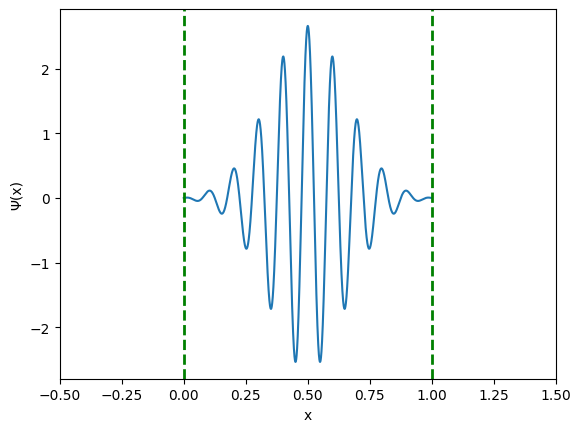

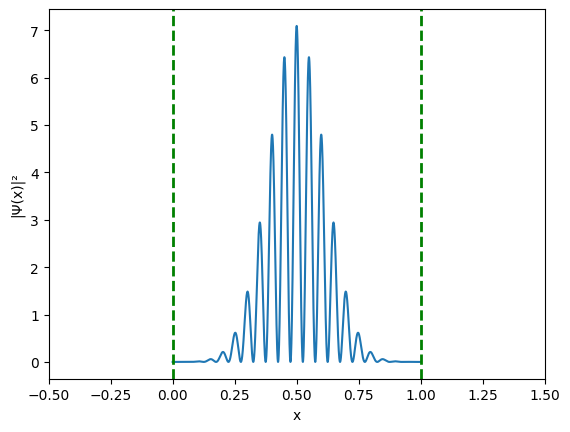

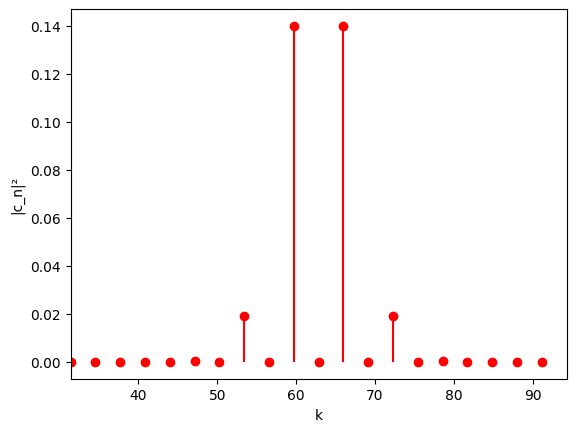

In [19]:
# Make k_bar amd sigma_k constants that are *independent* of the well width.
n_bar = 20
sigma_factor = 10
k_bar = n_bar * np.pi / 1
sigma_k = k_bar / sigma_factor
print('lambda / a = ', 2 * np.pi / ( k_bar * a ) )

Psi_tot, k_list, cn_list = Psi(k_bar, sigma_k, a, x)

plt.plot(x, Psi_tot)
plt.xlabel('x'); plt.ylabel('Ψ(x)')
# Mark the positions of the square well boundaries
plt.axvline(x = 0, color='green', linestyle='--', linewidth=2)
plt.axvline(x = a, color='green', linestyle='--', linewidth=2)
plt.xlim(a/2 - 1, a/2 + 1)

plt.figure();

plt.plot(x, np.abs(Psi_tot)**2)
# Mark the positions of the square well boundaries
plt.axvline(x = 0, color='green', linestyle='--', linewidth=2)
plt.axvline(x = a, color='green', linestyle='--', linewidth=2)
plt.xlabel('x'); plt.ylabel('|Ψ(x)|²');
plt.xlim(a/2 - 1, a/2 + 1)

plt.figure();

markerline, stemlines, baseline = plt.stem(k_list, np.abs(cn_list)**2)
plt.xlabel("k")
plt.ylabel("|c_n|²")
plt.xlim(k_bar - k_bar / 2, k_bar + k_bar / 2)

# Hide the baseline
baseline.set_visible(False)

# Optional: change colors
plt.setp(stemlines, color="red")
plt.setp(markerline, color="red");

Confirm proper normalization of $\Psi(x)$ and $c_n(k)$.

In [8]:
norm_Psi = sum(np.abs(Psi_tot)**2 * ( x[1] - x[0] ) ) 
norm_Psi

np.float64(0.9999999999999981)

In [9]:
norm_cn = sum(np.abs(cn_list)**2 * ( k_list[1] - k_list[0] ) ) 
norm_cn

np.float64(1.0)